In [206]:
pip install ucimlrepo

In [207]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [208]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Cargar dataset
bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

# 2️⃣ Combinar para procesar todo junto si es necesario
df = pd.concat([X, y], axis=1)

# 3️⃣ Revisar información general
print("📊 Info inicial:")
print(df.info())

# 4️⃣ Revisar si hay datos faltantes o duplicados
print("\n🔍 Valores nulos por columna:")
print(df.isnull().sum())

print("\n🧩 Filas duplicadas:", df.duplicated().sum())

# Si hay duplicados, los eliminamos:
df = df.drop_duplicates()

# 5️⃣ Identificar columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns
print("\n📋 Columnas categóricas:", list(cat_cols))

# 6️⃣ Convertir variables categóricas a numéricas
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# 7️⃣ Confirmar conversión
print("\n✅ Tipos de datos después de convertir:")
print(df.dtypes)

# 8️⃣ Separar nuevamente en X e y
X = df.drop(columns=y.columns)
y = df[y.columns]

📊 Info inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

🔍 Valores nulos por columna:
age       

In [209]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [210]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [211]:
    X=X.drop(['job', 'default','contact','previous','poutcome'], axis=1).values

In [212]:
X[:20]

array([[  58,    1,    2, 2143,    1,    0,    5,    8,  261,    1,   -1],
       [  44,    2,    1,   29,    1,    0,    5,    8,  151,    1,   -1],
       [  33,    1,    1,    2,    1,    1,    5,    8,   76,    1,   -1],
       [  47,    1,    3, 1506,    1,    0,    5,    8,   92,    1,   -1],
       [  33,    2,    3,    1,    0,    0,    5,    8,  198,    1,   -1],
       [  35,    1,    2,  231,    1,    0,    5,    8,  139,    1,   -1],
       [  28,    2,    2,  447,    1,    1,    5,    8,  217,    1,   -1],
       [  42,    0,    2,    2,    1,    0,    5,    8,  380,    1,   -1],
       [  58,    1,    0,  121,    1,    0,    5,    8,   50,    1,   -1],
       [  43,    2,    1,  593,    1,    0,    5,    8,   55,    1,   -1],
       [  41,    0,    1,  270,    1,    0,    5,    8,  222,    1,   -1],
       [  29,    2,    1,  390,    1,    0,    5,    8,  137,    1,   -1],
       [  53,    1,    1,    6,    1,    0,    5,    8,  517,    1,   -1],
       [  58,    1,    3,

In [213]:
y=y['y'].values

In [214]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [215]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [216]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [217]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    #Dropout(0.2),
    Dense(16, activation='relu'),
    #Dense(1, activation='sigmoid')  # salida binaria
    Dense(2, activation='softmax') #salida multiclase
])

# Creamos el optimizador con learning rate constante
optimizer = Adam(learning_rate=0.001)  # valor fijo

# Compilamos el modelo
model.compile(
    optimizer= optimizer,
#loss='binary_crossentropy',
loss='sparse_categorical_crossentropy', #se usa con la activacion softmax
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 946 (3.70 KB)

 Trainable params: 946 (3.70 KB)

 Non-trainable params: 0 (0.00 B)

In [218]:
# Entrenamos el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8726 - loss: 0.3503 - val_accuracy: 0.8974 - val_loss: 0.2470
Epoch 2/30
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8914 - loss: 0.2566 - val_accuracy: 0.8976 - val_loss: 0.2431
Epoch 3/30
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8911 - loss: 0.2473 - val_accuracy: 0.8963 - val_loss: 0.2379
Epoch 4/30
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8945 - loss: 0.2457 - val_accuracy: 0.8977 - val_loss: 0.2380
Epoch 5/30
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8971 - loss: 0.2415 - val_accuracy: 0.8955 - val_loss: 0.2368
Epoch 6/30
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8907 - loss: 0.2470 - val_accuracy: 0.8956 - val_loss: 0.2366
Epoch 7/30
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8963 - loss: 0.2376 - val_accuracy: 0.8969 - val_loss: 0.2350
Epoch 8/30
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9000 - loss: 0.2356 - val_accuracy: 0.

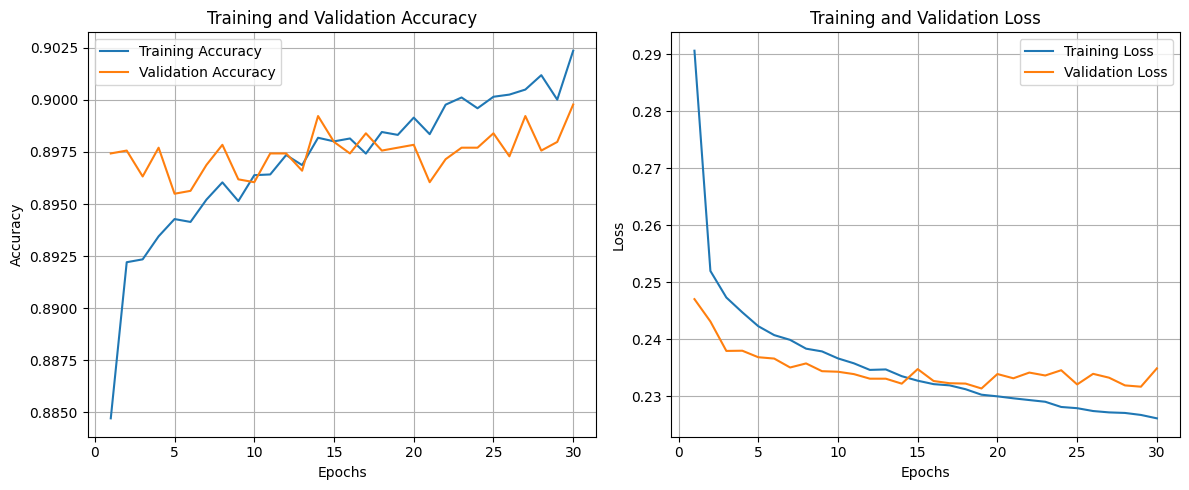

In [219]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [220]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en datos de prueba: {test_acc:.4f}")

Accuracy en datos de prueba: 0.8954


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


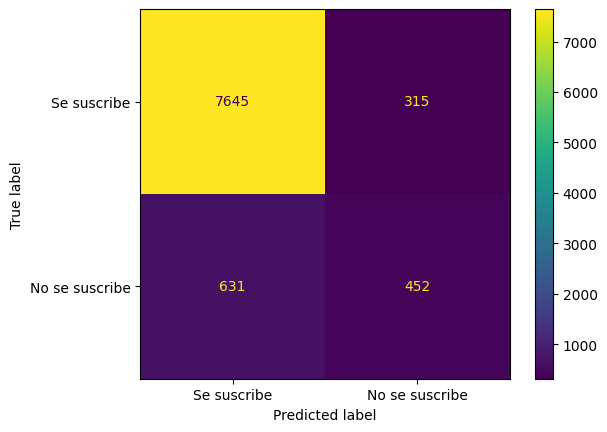

In [221]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

"""
#Esta es con clasificacion binaria
# Convertimos las probabilidades (0 a 1) a etiquetas binarias (0 o 1)
pred_labels = (predictions > 0.5).astype(int).flatten()

# 🔹 Paso 2: Calcular la matriz de confusión
cm = confusion_matrix(y_test, pred_labels)

# 🔹 Paso 3: Mostrarla gráficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues', values_format='d')  # 'd' muestra enteros
plt.title("Matriz de Confusión - Modelo de Detección de Diabetes")
plt.show()

"""

# 🔹 Paso 1: Obtener las predicciones del modelo
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, pred_labels)

# Para visualizarla
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Se suscribe', 'No se suscribe'])
disp.plot()

In [226]:
model.save('ModeloBanco.keras')
#model.save('ModeloDiabetes.h5') #h5 formato para guardar el modelo

In [227]:
modelo_cargado_tf = tf.keras.models.load_model('ModeloBanco.keras')
#modelo_cargado_tf = tf.keras.models.load_model('ModeloDiabetes.h5')

In [228]:
p=np.array([ 60,    1,    0,   60,    1,    0,    5,    8,  219,    1,   -1])
p=p.reshape(1,-1)
p=scaler.transform(p)
prediccion = round(modelo_cargado_tf.predict(p)[0][0])

if (prediccion==1):
  print("No se suscribe")
else:
  print("Se suscribe")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
No se suscribe
